## Assignment Part 1


### 1A: Image Smoothing in the Spatial and Frequency Domain

1. Read in the color image you have been provided. Display the image with an appropriate title.


Text(0.5, 1.0, 'Image of a teddy bear')

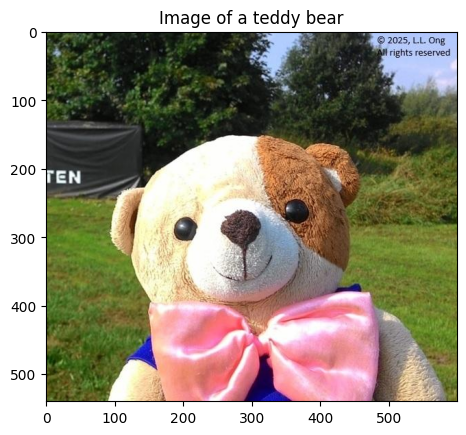

In [174]:
from skimage import io 
import matplotlib.pyplot as plt

# Loading the image
imrgb = io.imread('./2072964/2072964_rgbimage.jpg')

plt.imshow(imrgb)
plt.title('Image of a teddy bear')


2. Convert the color image which you have been provided to grayscale. Display the image with a gray colormap and an appropriate title.

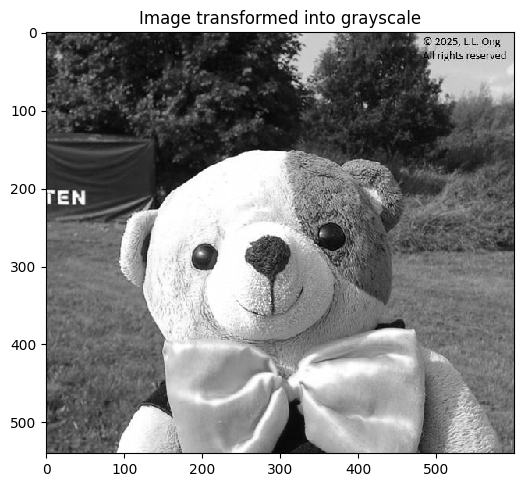

In [175]:
from skimage import color

# Transforming the image from rgb to grayscale
imgray = color.rgb2gray(imrgb)

io.imshow(imgray)
plt.title('Image transformed into grayscale')
io.show()

3.  Add 10% salt and pepper noise to the image.

Text(0.5, 1.0, 'Image with salt and pepper noise')

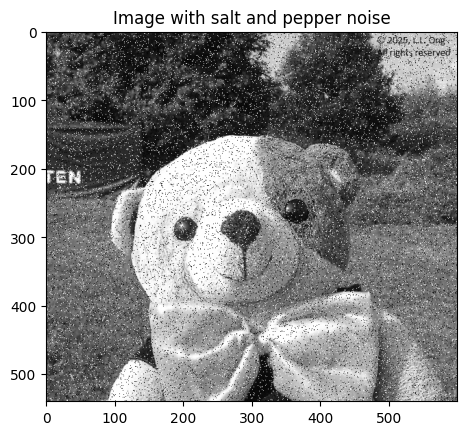

In [ ]:
from skimage.util import random_noise

# Adding noise to the image
imnoisy = random_noise(imgray, mode='s&p', amount=0.10)

plt.imshow(imnoisy, cmap = 'gray')
plt.title('Image with salt and pepper noise')

4.  Compare the time taken to run Gaussian blur operations in the spatial domain vs the frequency domain the following 7 values of ‘sigma‘ - 1,2,4,8,16,32 and 64. Plot the time taken vs sigma
for both spatial and frequency domain in the same plot. You can use the “time” module in Python. Briefly comment on your plot. What happens to the kernel size when ‘sigma‘ is larger?. Which domain
is preferred for larger kernels?

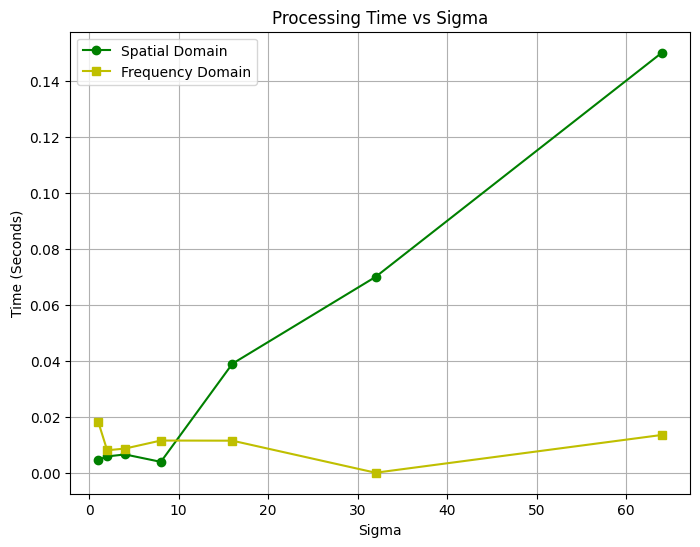

In [206]:
from time import time
from skimage.filters import gaussian
from scipy.fftpack import fftn, ifftshift, fftshift, ifftn
import numpy as np
from scipy import signal

sigmas = [1, 2, 4, 8, 16, 32, 64]
times_s = []
times_f = []
imfreq1 = fftn(imgray)


for sigma in sigmas:
    start_time = time()
    #Performing the Gaussian blur in the spatial domain
    imspatial = gaussian(imgray, sigma= sigma)
    end_time = time()
    times_s.append(end_time - start_time)
    #Performing the Gaussian blur in the frequency domain
    start_time = time()
    gauss_kernel = np.outer(signal.windows.gaussian(imgray.shape[0], sigma), signal.windows.gaussian(imgray.shape[1], sigma))
    freq_kernel = fftn(ifftshift(gauss_kernel))
    imfreq2 = np.real(ifftn(freq_kernel * imfreq1))
    end_time = time()
    times_f.append(end_time - start_time)
    # fig = plt.figure(figsize=(10,10)) 
    # plt.subplot(2,2,1), 
    # plt.imshow(imspatial,cmap='gray')
    # plt.title('Spatial Domain')
    # plt.subplot(2,2,2), 
    # plt.imshow(imfreq2,cmap='gray')
    # plt.title('Frequency Domain')

# print(imfreq2.shape, imgray.shape)  # have the same shape

plt.show()
plt.figure(figsize=(8, 6))
plt.plot(sigmas, times_s, marker='o', label='Spatial Domain', color = 'g')
plt.plot(sigmas, times_f, marker='s', label='Frequency Domain', color = 'y')
plt.xlabel('Sigma')
plt.ylabel('Time (Seconds)')
plt.title('Processing Time vs Sigma')
plt.legend()
plt.grid(True)
plt.show()

# The time is increasing lineraly in the spatial domain compared to the frequency domain, where it stays approximately constant when increasing the sigma value. Therefore, it's preferrable to perform the Gaussian blur in ht efrequency domain.


### 1B: Image Segmentation

1. Convert the image to HSV. Separate the Hue, Saturation and Value channels. Display the three channels separately in subplots with the corresponding intensity histograms.

(540, 600, 3) uint8 <class 'numpy.ndarray'>


Text(0.5, 1.0, 'Value channel')

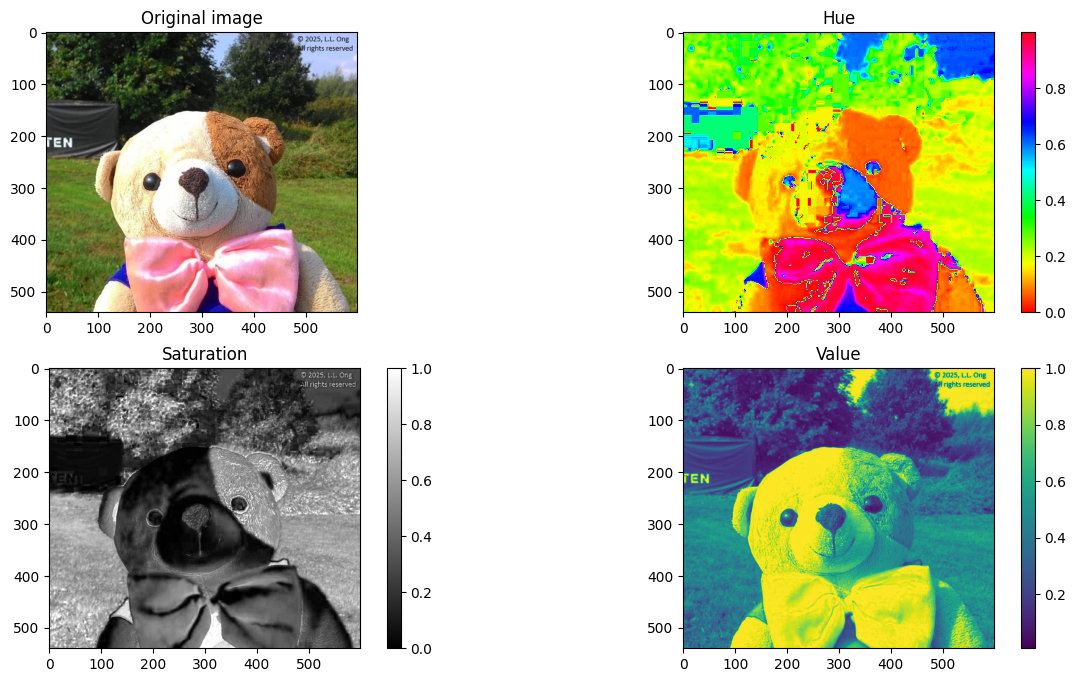

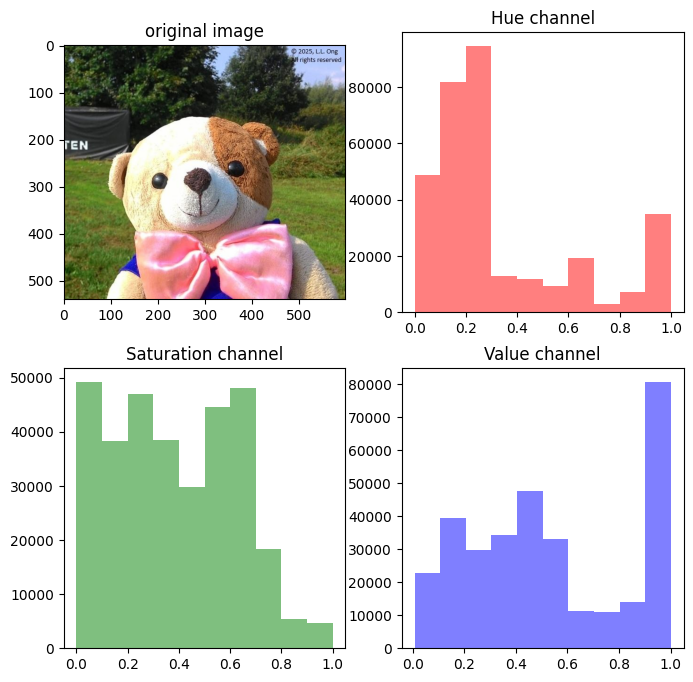

In [178]:
print(imrgb.shape, imrgb.dtype, type(imrgb)) 
imhsv = color.rgb2hsv(imrgb)

plt.figure(figsize = (15,8))
plt.subplot(2,2,1)
plt.imshow(imrgb)
plt.title('Original image')
plt.subplot(2,2,2)
plt.imshow(imhsv[:,:,0], cmap = 'hsv')
plt.colorbar()
plt.title('Hue')
plt.subplot(2,2,3)
plt.imshow(imhsv[:,:,1], cmap = 'gray')
plt.colorbar()
plt.title('Saturation')
plt.subplot(2,2,4)
plt.imshow(imhsv[:,:,2], cmap = 'viridis')
plt.colorbar()
plt.title('Value')

plt.figure(figsize = (8,8))
plt.subplot(2,2,1)
plt.imshow(imrgb)
plt.title('original image')
plt.subplot(2,2,2)
plt.hist(imhsv[:,:,0].ravel(), bins = 10, alpha = 0.5, facecolor = 'r')
plt.title('Hue channel')
plt.subplot(2,2,3)
plt.hist(imhsv[:,:,1].ravel(), bins = 10, alpha = 0.5, facecolor = 'g')
plt.title('Saturation channel')
plt.subplot(2,2,4)
plt.hist(imhsv[:,:,2].ravel(), bins = 10, alpha = 0.5, facecolor = 'b')
plt.title('Value channel')




2. Segment the teddy bear in the image to obtain a binary image where pixels representing the teddy bear (including his blue shirt and pink ribbon) are set to 1. Hint, you can segment the teddy bear, his pink ribbon and blue shirt separately and combine the results. 
Show the results for each step you took.

Text(0.5, 1.0, 'Image after using the closing operation with a disk = 8')

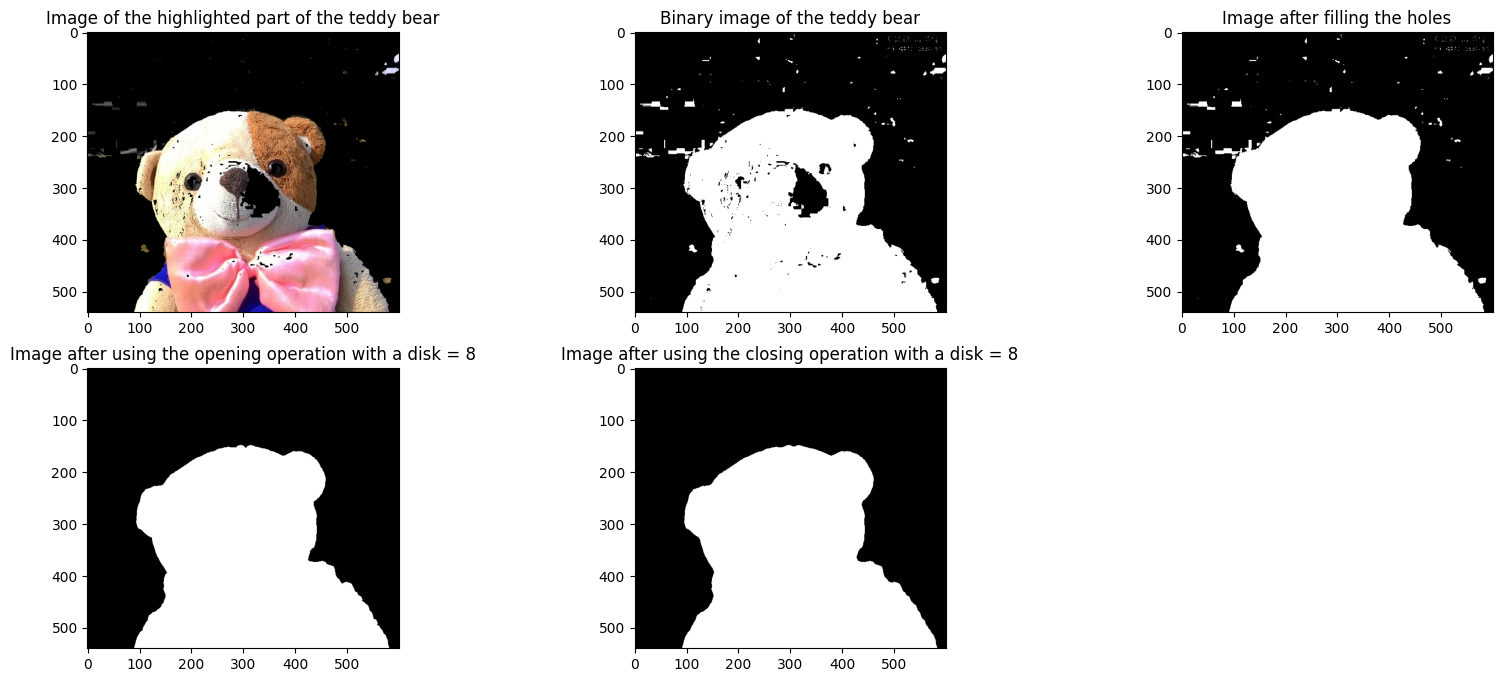

In [179]:
from scipy.ndimage import binary_fill_holes
from skimage.morphology import disk
from skimage.morphology import  binary_opening, binary_closing

# Choosing threshold values for the blue regions of the teddy bear from the hue channel
lower_mask_blue = imhsv[:,:,0] > 0.65
upper_mask_blue = imhsv[:,:,0] < 0.75

# Choosing threshold values for the orange portion of the bear from the hue channel
lower_mask_orange = imhsv[:,:,0] < 0.12

# Intersecting parts of the image from the hue, saturation, and value channels
lower_mask_top = (imhsv[:,:,0] > 0.2) & (imhsv[:,:,0] < 0.4) & (imhsv[:,:,2] > 0.9)
lower_mask_y = (imhsv[:,:,0] < 0.21) & (imhsv[:,:,0] > 0.01) & (imhsv[:,:,1] < 0.3) & (imhsv[:,:,2] > 0.7)

# Adding the masks together
mask = lower_mask_blue + lower_mask_orange + lower_mask_y + lower_mask_top

# Applying the masks on each channel of the image
red = imrgb[:,:,0]*mask
green = imrgb[:,:,1]*mask
blue = imrgb[:,:,2]*mask
im_masked = np.dstack((red,green,blue))

plt.figure(figsize = (20,8))
plt.subplot(231)
plt.imshow(im_masked)
plt.title('Image of the highlighted part of the teddy bear')

plt.subplot(232)
plt.imshow(mask, cmap = 'gray')
plt.title('Binary image of the teddy bear')

# Filling the holes inside the teddy bear
im_fill1 = binary_fill_holes(mask, structure=np.ones((3,3)))

plt.subplot(233)
plt.imshow(im_fill1, cmap = 'gray')
plt.title('Image after filling the holes')

# Applying a morphological opening to get rid of teh noise
cleaned_mask = binary_opening(im_fill1, disk(8))

plt.subplot(234)
plt.imshow(cleaned_mask, cmap = 'gray')
plt.title('Image after using the opening operation with a disk = 8')

# Apply a morphological closing to smooth boundaries
cleaned_mask = binary_closing(cleaned_mask, disk(8))

plt.subplot(235)
plt.imshow(cleaned_mask, cmap = 'gray')
plt.title('Image after using the closing operation with a disk = 8')



3. Show your original image with an overlay of the bounding box of teddy bear's head.

(540, 600, 3)


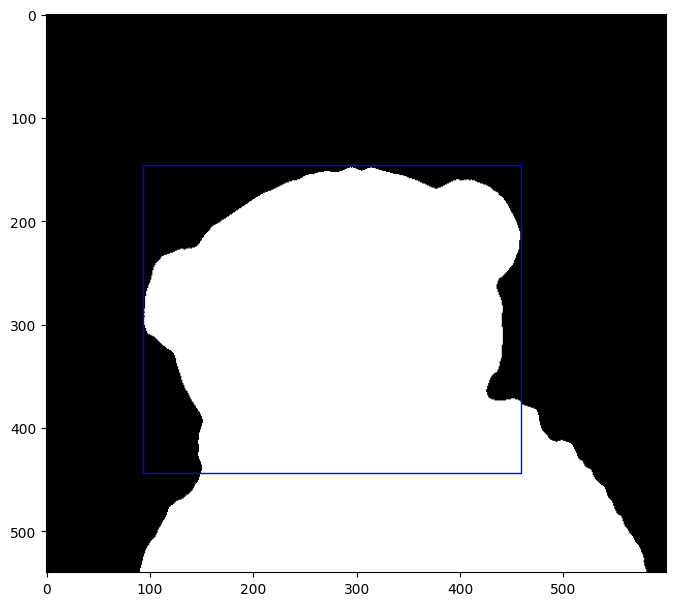

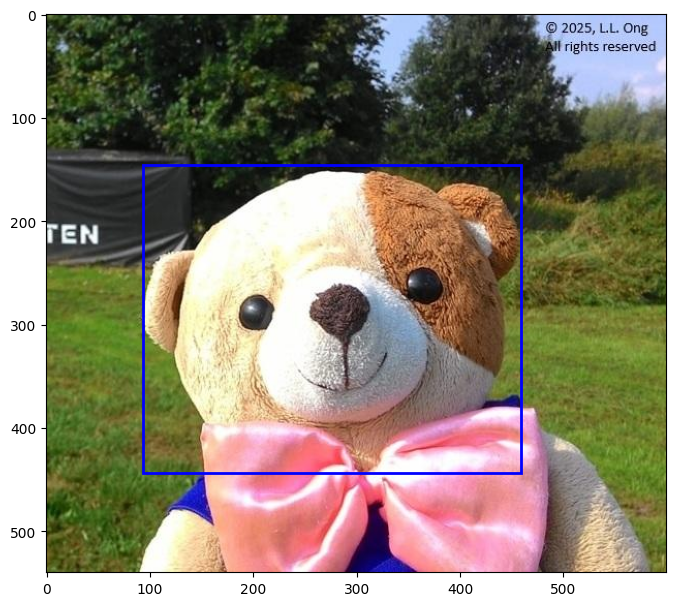

In [180]:
from skimage.morphology import  closing
from skimage.measure import label, regionprops
from skimage.morphology import square


print(im_masked.shape)
# Transforming the picture into hsv format
im_masked2= color.rgb2hsv(im_masked)

# Creating a binary mask for hue values 
hue_mask = (im_masked2[:,:,0] >= 0.05) & (im_masked2[:,:,0] <= 0.2)

# Cleaning up noise with morphological closing
hue_mask = closing(hue_mask, square(3))

# Labeling connected regions
labeled_image = label(hue_mask)

# Getting region properties
regions = regionprops(labeled_image)

# Sorting regions by area in descending order by area 
regions = sorted(regions, key=lambda r: r.area, reverse=True)

# Displaying labeled region
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.imshow(cleaned_mask, cmap='gray')

minr, minc, maxr, maxc = regions[0].bbox
rect = plt.Rectangle((minc, minr), maxc - minc, maxr - minr,
                        edgecolor='blue', linewidth=1, fill=False)
ax.add_patch(rect)
plt.show()

# Getting the bounding box of the head region
minr, minc, maxr, maxc = regions[0].bbox

# Drawing the bounding box around the teddy bear's head
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.imshow(imrgb)
rect = plt.Rectangle((minc, minr), maxc - minc, maxr - minr,
                     edgecolor='blue', linewidth=2, fill=False)
ax.add_patch(rect)
plt.show()


4. Show your original image with an overlay of bounding boxes or circular boundaries of each the teddy bear's eyes. You can use the segmentation results (from Q1B.2) or the original image. Display the resulting images with appropriate titles. Print the area and centroid of each eye.

The area of the eye is 907.9202768874502 pixels
The centroid of the eye is (203, 288)
The area of the eye is 1134.1149479459152 pixels
The centroid of the eye is (364, 264)


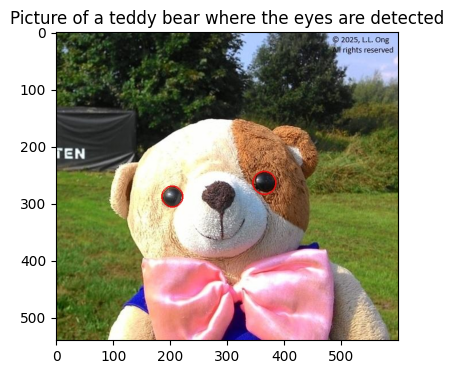

In [181]:
from skimage.transform import hough_circle, hough_circle_peaks
from skimage.draw import circle_perimeter
from skimage import feature
from skimage.util import img_as_ubyte
from skimage.measure import label, regionprops
from skimage.color import label2rgb
import math

# Loading picture and detecting edges
image = img_as_ubyte(imgray)
edges = feature.canny(image, sigma=3, low_threshold=10, high_threshold=50)

# Choosing the radii range 
hough_radii = np.arange(17, 20, 2)
hough_res = hough_circle(edges, hough_radii)

# Choosing the 2 circles for the eyes with the given radii range
accums, cx, cy, radii = hough_circle_peaks(hough_res, hough_radii,total_num_peaks=2)

imrgb2 = imrgb.copy()
# Overlaying the found circles over the original image
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10, 4))


for center_y, center_x, radius in zip(cy, cx, radii):
    # Adding 3 layers for thickness
    for i in range(0, 3):  
        circy, circx = circle_perimeter(center_y, center_x, radius + i, shape=imrgb2.shape)
        # Choosing the color red
        imrgb2[circy, circx] = (220, 20, 20) 
    # Calculating the area of the eyes based on the radius and the formula of the area of a circle
    area = math.pi * (radius ** 2)
    print(f'The area of the eye is {area} pixels')
    print(f'The centroid of the eye is {center_x, center_y}')

ax.imshow(imrgb2)
plt.title("Picture of a teddy bear where the eyes are detected")
plt.show()


ChatGPT was utilized at times for providing certain code snippets.